# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [37]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  50000 non-null  object 
 1   teacher_prefix                                50000 non-null  object 
 2   project_grade_category                        50000 non-null  object 
 3   teacher_number_of_previously_posted_projects  50000 non-null  int64  
 4   project_is_approved                           50000 non-null  int64  
 5   clean_categories                              50000 non-null  object 
 6   clean_subcategories                           50000 non-null  object 
 7   essay                                         50000 non-null  object 
 8   price                                         50000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.4+ MB


In [38]:
print(data.columns.values)

['school_state' 'teacher_prefix' 'project_grade_category'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price']


In [62]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [14]:
y = data['project_is_approved']
X = data.drop(['project_is_approved'],axis=1)
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


# Importing all important libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

import re
import pickle
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')
from chart_studio.plotly import plotly
import plotly.offline as offline


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [65]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [66]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.33,stratify=y_train)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(22445, 8)
(11055, 8)
(16500, 8)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [147]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)

vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer_bow.fit(X_train['essay'].values)

X_train_essay_BOW = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_BOW = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_BOW = vectorizer_bow.transform(X_test['essay'].values)
print("Shape after performing vectorization:")
print("="*100)
print(X_train_essay_BOW.shape,y_train.shape)
print(X_cv_essay_BOW.shape,y_cv.shape)
print(X_test_essay_BOW.shape,y_test.shape)



Shape after performing vectorization:
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [17]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)
print("Shape after performing tfiidf_vectorization:")
print("="*100)
print(X_train_essay_tfidf.shape,y_train.shape)
print(X_cv_essay_tfidf.shape,y_cv.shape)
print(X_test_essay_tfidf.shape,y_test.shape)

Shape after performing tfiidf_vectorization:
(22445, 30274) (22445,)
(11055, 30274) (11055,)
(16500, 30274) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>1.4.1 one hot encoding categorical features: School State</h3>

In [150]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
vectorizer_state = CountVectorizer(binary=True)
vectorizer_state.fit(X_train['school_state'].values)

X_train_school_state = vectorizer_state.transform(X_train['school_state'].values)
X_cv_school_state = vectorizer_state.transform(X_cv['school_state'].values)
X_test_school_state = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorization of feature_school_state:")
print("="*100)
print(X_train_school_state.shape,y_train.shape)
print(X_cv_school_state.shape,y_cv.shape)
print(X_test_school_state.shape,y_test.shape)

print(vectorizer_sch.get_feature_names())

After vectorization of feature_school_state:
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [151]:
print("Unique categories in teacher prefix:",X_train['teacher_prefix'].unique())
print("="*100)
vectorizer_teach = CountVectorizer(binary=True)
vectorizer_teach.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer_teach.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer_teach.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer_teach.transform(X_test['teacher_prefix'].values)
print("\nAfter vectorization of teacher_prefix:")
print("="*100)
print(X_train_teacher_prefix.shape,y_train.shape)
print(X_cv_teacher_prefix.shape,y_cv.shape)
print(X_test_teacher_prefix.shape,y_test.shape)

Unique categories in teacher prefix: ['mrs' 'ms' 'mr' 'teacher' 'dr']

After vectorization of teacher_prefix:
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)


<h3>1.4.3 one hot encoding categorical features: project_grade_category</h3>

In [152]:
print(X_train['project_grade_category'].unique())
print("="*100)
vectorizer_grade = CountVectorizer(binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

X_train_grade = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade = vectorizer_grade.transform(X_test['project_grade_category'].values)
print("\nShape after vectorization of project_grade_category")
print("="*100)
print(X_train_grade.shape,y_train.shape)
print(X_cv_grade.shape,y_cv.shape)
print(X_test_grade.shape,y_test.shape)

['grades_prek_2' 'grades_9_12' 'grades_3_5' 'grades_6_8']

Shape after vectorization of project_grade_category
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)


<h3>1.4.4 one hot encoding categorical features: clean_categories</h3>

In [153]:
vectorizer_clean = CountVectorizer(binary=True)
vectorizer_clean.fit(X_train["clean_categories"].values)

X_train_clean_cate = vectorizer_clean.transform(X_train['clean_categories'].values)
X_cv_clean_cate = vectorizer_clean.transform(X_cv['clean_categories'].values)
X_test_clean_cate = vectorizer_clean.transform(X_test['clean_categories'].values)
print("Shapes after vectorizing clean_categories feature:")
print("="*100)
print(X_train_clean_cate.shape)
print(X_cv_clean_cate.shape,y_cv.shape)
print(X_test_clean_cate.shape,y_test.shape)
print(vectorizer.get_feature_names())

Shapes after vectorizing clean_categories feature:
(22445, 9)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>1.4.5 one hot encoding categorical features: clean_subcategories</h3>

In [154]:
vectorizer_sub = CountVectorizer(binary=True)
vectorizer_sub.fit(X_train['clean_subcategories'].values)

X_train_subcate = vectorizer_sub.transform(X_train['clean_subcategories'].values)
X_cv_subcate = vectorizer_sub.transform(X_cv['clean_subcategories'])
X_test_subcate = vectorizer_sub.transform(X_test['clean_subcategories'])
print("Shapes after vectorizing clean_subcategories feature:")
print('='*100)
print(X_train_subcate.shape,y_train.shape)
print(X_cv_subcate.shape,y_cv.shape)
print(X_test_subcate.shape,y_test.shape)

Shapes after vectorizing clean_subcategories feature:
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)


<h3>1.4.6 encoding numerical features: Price</h3>

In [155]:
from sklearn.preprocessing import MinMaxScaler
price_scaler = MinMaxScaler()
price_scaler.fit(X_train['price'].values.reshape(-1,1))
X_train_price_scaler = price_scaler.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_scaler = price_scaler.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_scaler = price_scaler.transform(X_test['price'].values.reshape(-1,1))
print("encoding numerical features Price:")
print("="*100)
print(X_train_price_scaler.shape)
print(X_cv_price_scaler.shape)
print(X_test_price_scaler.shape)



encoding numerical features Price:
(22445, 1)
(11055, 1)
(16500, 1)


<h3>1.4.7 encoding teacher_number_of_previously_posted_projects <h3>

In [156]:
from sklearn.preprocessing import MinMaxScaler
previous_year_scaler = MinMaxScaler()

previous_year_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_projects = previous_year_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_previous_projects = previous_year_scaler.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_projects = previous_year_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("encoding numerical features teacher_number_of_previously_posted_projects:")
print("="*100)
print(X_train_previous_projects.shape)
print(X_cv_previous_projects.shape)
print(X_test_previous_projects.shape)

encoding numerical features teacher_number_of_previously_posted_projects:
(22445, 1)
(11055, 1)
(16500, 1)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [25]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack
# Set 1: categorical, numerical features  + preprocessed_essay (BOW)
x_tr = hstack((X_train_school_state,X_train_clean_cate,X_train_grade,X_train_subcate,X_train_teacher_prefix,X_train_essay_BOW,X_train_price_scaler,X_train_previous_projects))
x_cv = hstack((X_cv_school_state,X_cv_clean_cate,X_cv_grade,X_cv_subcate,X_cv_teacher_prefix,X_cv_essay_BOW,X_cv_price_scaler,X_cv_previous_projects))
x_ts = hstack((X_test_school_state,X_test_clean_cate,X_test_grade,X_test_subcate,X_test_teacher_prefix,X_test_essay_BOW,X_test_price_scaler,X_test_previous_projects))
x_tr = x_tr.tocsr()
x_ts = x_ts.tocsr()
x_cv = x_cv.tocsr()
print(x_tr.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_ts.shape,y_test.shape)

(22445, 5101) (22445,)
(11055, 5101) (11055,)
(16500, 5101) (16500,)


In [127]:

import math as m

alpha = [0.00001, 0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
log_alpha = list(map(lambda x: m.log10(x),alpha))



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.65it/s]


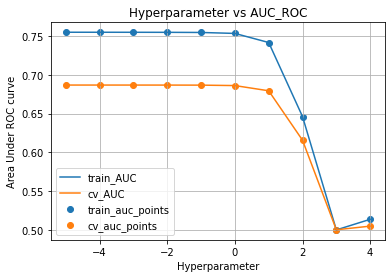

In [128]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(alpha):
    neigh = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    neigh.fit(x_tr,y_train)
    
    y_train_pred = neigh.predict_proba(x_tr)[:,1]
    y_cv_pred = neigh.predict_proba(x_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
plt.plot(log_alpha,train_auc,label='train_AUC')
plt.plot(log_alpha,cv_auc,label='cv_AUC')

plt.scatter(log_alpha,train_auc,label = 'train_auc_points')
plt.scatter(log_alpha,cv_auc,label = 'cv_auc_points')
plt.xlabel("Hyperparameter")
plt.ylabel("Area Under ROC curve")
plt.title("Hyperparameter vs AUC_ROC")
plt.grid()
plt.legend()
plt.show()

In [129]:
best_alpha = 1 

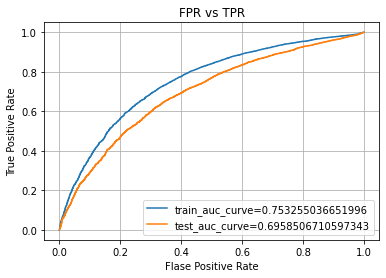

In [130]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
#from sklearn.preprocessing import roc_curve,auc
from sklearn.metrics import roc_curve
neigh = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])
neigh.fit(x_tr,y_train)

y_train_pred = neigh.predict_proba(x_tr)[:,1]
y_test_pred = neigh.predict_proba(x_ts)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

train_auc = auc(train_fpr,train_tpr)
test_auc = auc(test_fpr,test_tpr)

plt.plot(train_fpr,train_tpr,label='train_auc_curve='+str(train_auc))
plt.plot(test_fpr,test_tpr,label='test_auc_curve='+str(test_auc))
plt.grid()
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("FPR vs TPR")
plt.show()


In [131]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(threshould,fpr,tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
     # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba,threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [132]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = best_threshold(train_thresholds,train_fpr,train_tpr)
print("Train_Confusion_matrix")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)))
print("="*100)
print("Test_Confusion_matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))

the maximum value of tpr*(1-fpr) 0.4831073809409621 for threshold 0.493
Train_Confusion_matrix
[[ 2486  1109]
 [ 5681 13169]]
Test_Confusion_matrix
[[1609 1033]
 [4351 9507]]


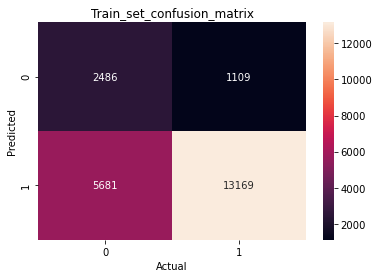

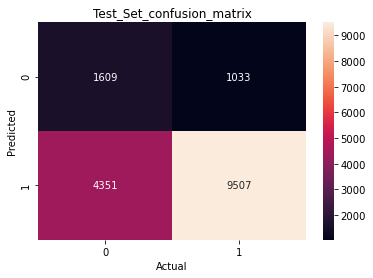

In [133]:
import seaborn as sns
heatmap_train = sns.heatmap(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)),annot=True,fmt = 'd')
plt.title("Train_set_confusion_matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
print("="*100)
heatmap_test = sns.heatmap(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)),annot=True,fmt='d')
plt.title("Test_Set_confusion_matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Set 2

In [134]:
from scipy.sparse import hstack

X_tr = hstack((X_train_school_state,X_train_clean_cate,X_train_grade,X_train_subcate,X_train_teacher_prefix,X_train_essay_tfidf,X_train_price_scaler,X_train_previous_projects))
X_cv1 = hstack((X_cv_school_state,X_cv_clean_cate,X_cv_grade,X_cv_subcate,X_cv_teacher_prefix,X_cv_essay_tfidf,X_cv_price_scaler,X_cv_previous_projects))
X_ts = hstack((X_test_school_state,X_test_clean_cate,X_test_grade,X_test_subcate,X_test_teacher_prefix,X_test_essay_tfidf,X_test_price_scaler,X_test_previous_projects))

X_tr = X_tr.tocsr()
X_cv1 = X_cv1.tocsr()
X_ts = X_ts.tocsr()

print(X_tr.shape,y_train.shape)
print(X_cv1.shape,y_cv.shape)
print(X_ts.shape,y_test.shape)

(22445, 30375) (22445,)
(11055, 30375) (11055,)
(16500, 30375) (16500,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.84it/s]


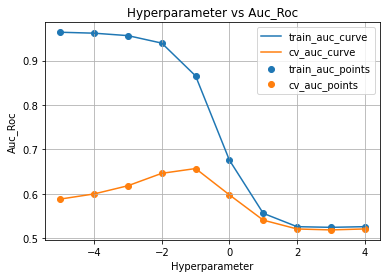

In [135]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc1 = []
cv_auc1 = []
for i in tqdm (alpha):
    neigh = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    neigh.fit(X_tr,y_train)
    
    y_train_pred1 = neigh.predict_proba(X_tr)[:,1]
    y_cv_pred1 = neigh.predict_proba(X_cv1)[:,1]
    
    train_auc1.append(roc_auc_score(y_train,y_train_pred1))
    cv_auc1.append(roc_auc_score(y_cv,y_cv_pred1))

plt.plot(log_alpha,train_auc1,label='train_auc_curve')
plt.plot(log_alpha,cv_auc1,label='cv_auc_curve')

plt.scatter(log_alpha,train_auc1,label='train_auc_points')
plt.scatter(log_alpha,cv_auc1,label='cv_auc_points')
plt.title("Hyperparameter vs Auc_Roc")
plt.xlabel('Hyperparameter')
plt.ylabel('Auc_Roc')
plt.legend()
plt.grid()
plt.show()

In [108]:
best_alpha1 = 0.1

In [136]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
from sklearn.naive_bayes import MultinomialNB
neigh = MultinomialNB(alpha=best_alpha1,class_prior=[0.5,0.5])
neigh.fit(X_tr,y_train)

y_train_pred1 = neigh.predict_proba(X_tr)[:,1]
y_test_pred1 = neigh.predict_proba(X_ts)[:,1]

train_fpr1,train_tpr1,train_threshold1 = roc_curve(y_train,y_train_pred1)
test_fpr1,test_tpr1,test_threshold1 = roc_curve(y_test,y_test_pred1)

train_auc1 = auc(train_fpr1,train_tpr1)
test_auc1 = auc(test_fpr1,test_tpr1)



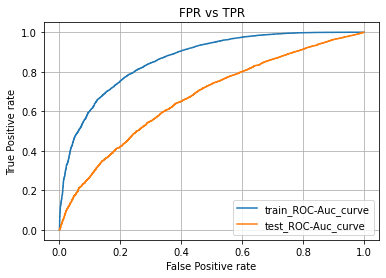

In [137]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
plt.plot(train_fpr1,train_tpr1,label='train_ROC-Auc_curve')
plt.plot(test_fpr1,test_tpr1,label='test_ROC-Auc_curve')
plt.title("FPR vs TPR")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.grid()
plt.show()

In [143]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
print("="*100)
from sklearn.metrics import confusion_matrix
best_t1 = best_threshold(train_threshold1,train_fpr1,train_tpr1)
print("Train_Confusion_matrix")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred1,best_t1)))
print("="*100)
print("Test_Confusion_matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred1,best_t1)))

the maximum value of tpr*(1-fpr) 0.6077491948366247 for threshold 0.551
Train_Confusion_matrix
[[ 2785   810]
 [ 4062 14788]]
Test_Confusion_matrix
[[ 1271  1371]
 [ 3474 10384]]


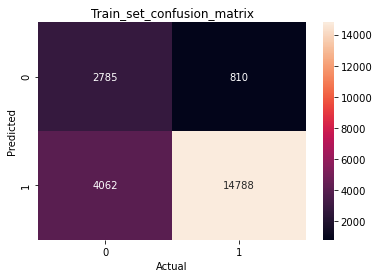

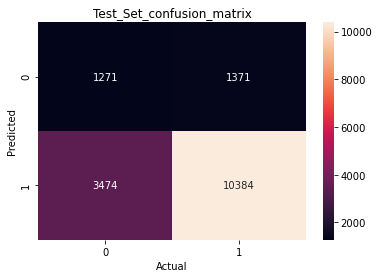

In [144]:
import seaborn as sns
heatmap_train1 = sns.heatmap(confusion_matrix(y_train,predict_with_best_t(y_train_pred1,best_t1)),annot=True,fmt = 'd')
plt.title("Train_set_confusion_matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
print("="*100)
heatmap_test1 = sns.heatmap(confusion_matrix(y_test,predict_with_best_t(y_test_pred1,best_t1)),annot=True,fmt='d')
plt.title("Test_Set_confusion_matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<h3>Top 10 important features of positive class from SET 2<h3>

In [165]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
tfidf_feature_probs_p = []
for k in range(30375):
    tfidf_feature_probs_p.append(neigh.feature_log_prob_[1,k])
print(len(tfidf_feature_probs_p))


30375


In [166]:
tfidf_feature_names = []
for k in vectorizer_state.get_feature_names():#school_state
    tfidf_feature_names.append(k)
for k in vectorizer_clean.get_feature_names():#clean_categories
    tfidf_feature_names.append(k)
for k in vectorizer_grade.get_feature_names():#project_grade_category
    tfidf_feature_names.append(k)
for k in vectorizer_sub.get_feature_names():#clean_subcategories
    tfidf_feature_names.append(k)
for k in vectorizer_teach.get_feature_names():# teacher_prefix
    tfidf_feature_names.append(k)
for k in vectorizer_tfidf.get_feature_names():#essay_tfidf
    tfidf_feature_names.append(k)
tfidf_feature_names.append(price_scaler)#price
tfidf_feature_names.append(previous_year_scaler)#previously_approved_projects

print(len(tfidf_feature_names))

30375


In [168]:
import pandas as pd
tfidf_features = pd.DataFrame({'feature_probs':tfidf_feature_probs_p,'feature_names':tfidf_feature_names})
final_tfidf_features = tfidf_features.sort_values(by='feature_probs',ascending=False)
print(final_tfidf_features.head(10))

    feature_probs       feature_names
96      -3.336371                 mrs
55      -3.454977   literacy_language
63      -3.602846       grades_prek_2
56      -3.737312        math_science
97      -3.773080                  ms
60      -3.786116          grades_3_5
81      -3.893054            literacy
83      -4.108450         mathematics
82      -4.297910  literature_writing
53      -4.420497       health_sports


<h3> Top 10 important features of negative class from SET 2 <h3>

In [194]:
tfidf_feature_probs_n = []
for k in range(30375):
    tfidf_feature_probs_n.append(neigh.feature_log_prob_[0,k])
print(len(tfidf_feature_probs_n))

30375


In [171]:
tfidf_feature_names = []
for k in vectorizer_state.get_feature_names():#school_state
    tfidf_feature_names.append(k)
for k in vectorizer_clean.get_feature_names():#clean_categories
    tfidf_feature_names.append(k)
for k in vectorizer_grade.get_feature_names():#project_grade_category
    tfidf_feature_names.append(k)
for k in vectorizer_sub.get_feature_names():#clean_subcategories
    tfidf_feature_names.append(k)
for k in vectorizer_teach.get_feature_names():# teacher_prefix
    tfidf_feature_names.append(k)
for k in vectorizer_tfidf.get_feature_names():#essay_tfidf
    tfidf_feature_names.append(k)
tfidf_feature_names.append(price_scaler)#price
tfidf_feature_names.append(previous_year_scaler)#previously_approved_projects

print(len(tfidf_feature_names))

30375


In [172]:
import pandas as pd
tfidf_features = pd.DataFrame({'feature_probs':tfidf_feature_probs_n,'feature_names':tfidf_feature_names})
final_tfidf_features = tfidf_features.sort_values(by='feature_probs',ascending=False)
print(final_tfidf_features.head(10))

    feature_probs       feature_names
96      -3.430015                 mrs
63      -3.615407       grades_prek_2
55      -3.616069   literacy_language
56      -3.685246        math_science
97      -3.745911                  ms
60      -3.855710          grades_3_5
81      -4.089613            literacy
83      -4.106760         mathematics
82      -4.389733  literature_writing
53      -4.501955       health_sports


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [190]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable
compare_model = PrettyTable(['Vectorizer','Model','Hyperparameter','AUC','Best_threshould'])
compare_model.add_row (["Bag_of_words","MultinomialNB",best_alpha,np.round(test_auc,5),np.round(best_t,4)])
compare_model.add_row (["Tfidf","MultinomialNB",best_alpha1,np.round(test_auc1,5),np.round(best_t1,5)])
print(compare_model)

+--------------+---------------+----------------+---------+-----------------+
|  Vectorizer  |     Model     | Hyperparameter |   AUC   | Best_threshould |
+--------------+---------------+----------------+---------+-----------------+
| Bag_of_words | MultinomialNB |       1        | 0.69585 |      0.5511     |
|    Tfidf     | MultinomialNB |      0.1       | 0.67133 |     0.55111     |
+--------------+---------------+----------------+---------+-----------------+


We can state that the model which uses Bag_of_words Encoding to transform the text features has AUC_Score greater than that of TFIDF Encoding.Hence,we can conclude that both the models performs on different hyperparameters.